# Basic visualisation
* first using the troute pickle output 
* then using the flowveldepth csv files

In [ ]:
# Install matplotlib
import sys
!{sys.executable} -m pip install matplotlib

In [1]:
# open the pickled file
import pickle
# pickle is just a way to save python objects to a file
# this is the path to the pickled file which is a debug output from troute at 5 minute intervals
pickle_path = './output/wb-1644660/outputs/lcr_flowveldepth_300.pkl'
with open(pickle_path, 'rb') as f:
    data = pickle.load(f)
data


,"(0, q)","(0, v)","(0, d)","(1, q)","(1, v)","(1, d)","(2, q)","(2, v)","(2, d)","(3, q)",...,"(1436, d)","(1437, q)","(1437, v)","(1437, d)","(1438, q)","(1438, v)","(1438, d)","(1439, q)","(1439, v)","(1439, d)"
1644660,0.000000,0.000000,0.000000,0.000636,0.103172,0.009627,0.003685,0.080539,0.006628,0.008727,...,0.331622,1.357656,0.983011,0.331621,1.357646,0.983009,0.331619,1.357638,0.983007,0.331618
1644661,0.000000,0.000000,0.000000,0.013668,0.105586,0.010093,0.095362,0.184231,0.023424,0.317355,...,1.493320,17.960020,2.268617,1.493316,17.959911,2.268615,1.493313,17.959808,2.268612,1.493310
1644662,0.000000,0.000000,0.000000,0.002407,0.025445,0.010000,0.019909,0.044588,0.023300,0.069980,...,2.891101,40.019409,0.842017,2.891082,40.018837,0.842014,2.891063,40.018284,0.842011,2.891045
1644663,0.000000,0.000000,0.000000,0.005827,0.101395,0.009980,0.042212,0.208663,0.029671,0.155120,...,2.011070,46.046104,2.713061,2.011057,46.045307,2.713052,2.011044,46.044537,2.713043,2.011032
1644664,0.000000,0.000000,0.000000,0.001900,0.026573,0.009985,0.013928,0.050330,0.026160,0.049863,...,3.184967,56.101765,0.936799,3.184899,56.099201,0.936789,3.184833,56.096725,0.936778,3.184769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657188,0.940237,0.138674,0.010670,3.052518,0.236234,0.024191,5.440012,0.336614,0.042173,7.824382,...,0.612227,1.430791,1.528683,0.612227,1.430791,1.528683,0.612226,1.430790,1.528683,0.612226
1657189,0.580440,0.107942,0.010337,1.968935,0.185922,0.023748,3.710271,0.266426,0.041585,5.681420,...,0.761002,2.256302,1.404269,0.761001,2.256299,1.404269,0.761001,2.256296,1.404268,0.761001
1657190,1.126039,0.091267,0.010298,3.699837,0.157558,0.023696,6.891234,0.226193,0.041515,10.547331,...,0.942537,3.543565,1.357861,0.942537,3.543561,1.357861,0.942536,3.543558,1.357861,0.942536
1657191,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [40]:
# let's visualize the final nexus
# get the row with the lowest index 
downstream_nexus = data.iloc[0]
downstream_nexus

(0, q)       0.000000
(0, v)       0.000000
(0, d)       0.000000
(1, q)       0.000636
(1, v)       0.103172
               ...   
(1438, v)    0.983009
(1438, d)    0.331619
(1439, q)    1.357638
(1439, v)    0.983007
(1439, d)    0.331618
Name: 1644660, Length: 4320, dtype: float32

In [15]:
nexus_dict = downstream_nexus.to_dict()


In [38]:
flow = 'q' # q v d, flow, velocity, depth
velocity = 'v'
depth = 'd'
flows = []
velocities = []
depths = []
for k, v in nexus_dict.items():
    if k[1] == flow:
        flows.append(v)
    elif k[1] == velocity:
        velocities.append(v)
    elif k[1] == depth:
        depths.append(v)
print(flows[:5], velocities[:5], depths[:5])

[0.0, 0.0006356090307235718, 0.003685085568577051, 0.008726680651307106, 0.019182011485099792] [0.0, 0.10317176580429077, 0.08053930103778839, 0.13282683491706848, 0.1899549961090088] [0.0, 0.009627017192542553, 0.006627706810832024, 0.014101461507380009, 0.024264587089419365]


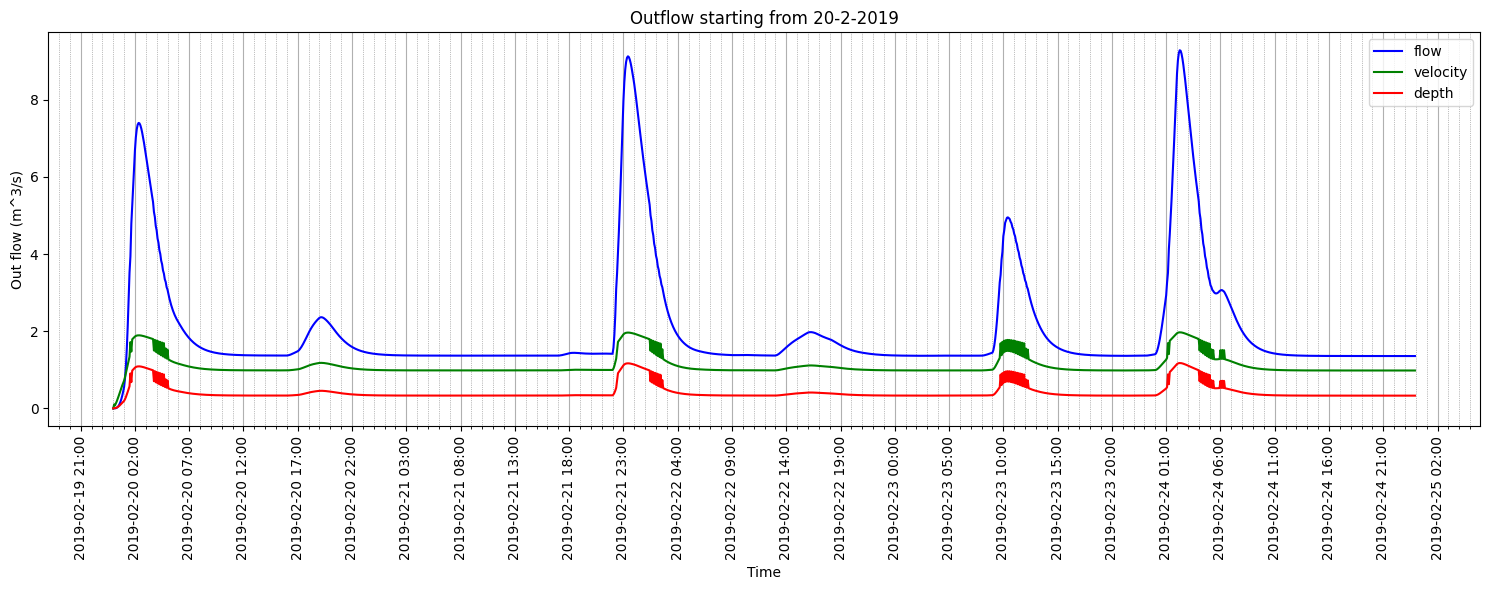

In [39]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime

# Start time of the simulation
start_time = datetime.datetime(2019, 2, 20)

# Generating timestamps for each aggregation
timestamps_5min = [start_time + datetime.timedelta(minutes=5*i) for i in range(len(flows))]

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(timestamps_5min, flows, label='flow', color='blue', linestyle='-')
plt.plot(timestamps_5min, velocities, label='velocity', color='green', linestyle='-')
plt.plot(timestamps_5min, depths, label='depth', color='red', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Out flow (m^3/s)')
plt.title('Outflow starting from 20-2-2019')

# Formatting the date ticks
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=5))  # Tick every 5 hours for readability
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.grid(axis='x')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# From CSV 201001010300.flowveldepth.csv etc

In [41]:
# optionally clean up some of the ngen output / t-route input files
import os
from pathlib import Path
folder_path = Path('./output/wb-11908/')
# move all the parquet and csv files to a new folder
new_folder = folder_path / 'working_dir'
new_folder.mkdir(exist_ok=True)
for file in folder_path.glob('*.parquet'):
    os.rename(file, new_folder / file.name)
for file in folder_path.glob('*.csv'):
    os.rename(file, new_folder / file.name)
    

### Converting the by timestep output into a per catchment output

In [51]:
import csv
from pathlib import Path
# Path to your CSV files
subset_folder = Path('./output/wb-11908')
csvs = (subset_folder / 'outputs').glob('*.csv')
by_catchment_folder = subset_folder / 'outputs' /  'by_catchment'
by_catchment_folder.mkdir(exist_ok=True)
# Glob pattern to iterate over all CSV files in the directory
for filename in csvs:
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)  # Skip the header row
        for row in reader:
            # Extract the ID and the rest of the row
            id, *data = row            
            # Open or create a file for this ID and append the data
            with open(by_catchment_folder / f'cat-{id}.csv', 'a', newline='') as idfile:
                writer = csv.writer(idfile)
                # Optionally, include the timestep information in the data, e.g., from the filename
                timestamp = filename.stem.split('.')[-2]
                writer.writerow([timestamp, *data])                




Data has been appended to files based on the first index.


In [57]:
# load the catchment data
import pandas as pd
catchment_data = pd.read_csv(by_catchment_folder / 'cat-11900.csv', header=None)
catchment_data.columns = ['timestamp', 'flow', 'velocity', 'depth', 'ndg']
catchment_data['timestamp'] = pd.to_datetime(catchment_data['timestamp'], format='%Y%m%d%H%M')
catchment_data.set_index('timestamp', inplace=True)
# sort the data by timestamp
catchment_data.sort_index(inplace=True)
catchment_data.head()

,flow,velocity,depth,ndg
timestamp,,,,
2010-01-01 00:00:00,0.000000,0.000000,0.000000,-9999.0
2010-01-01 01:00:00,0.015972,0.164185,0.027962,-9999.0
2010-01-01 02:00:00,0.179997,0.416613,0.119261,-9999.0
2010-01-01 03:00:00,0.661855,0.666133,0.258377,-9999.0
2010-01-01 04:00:00,1.382415,0.853530,0.396741,-9999.0


## plot the data like before
 
This data is at the troute output interval   
With the example realisation, the troute output interval is **hourly**

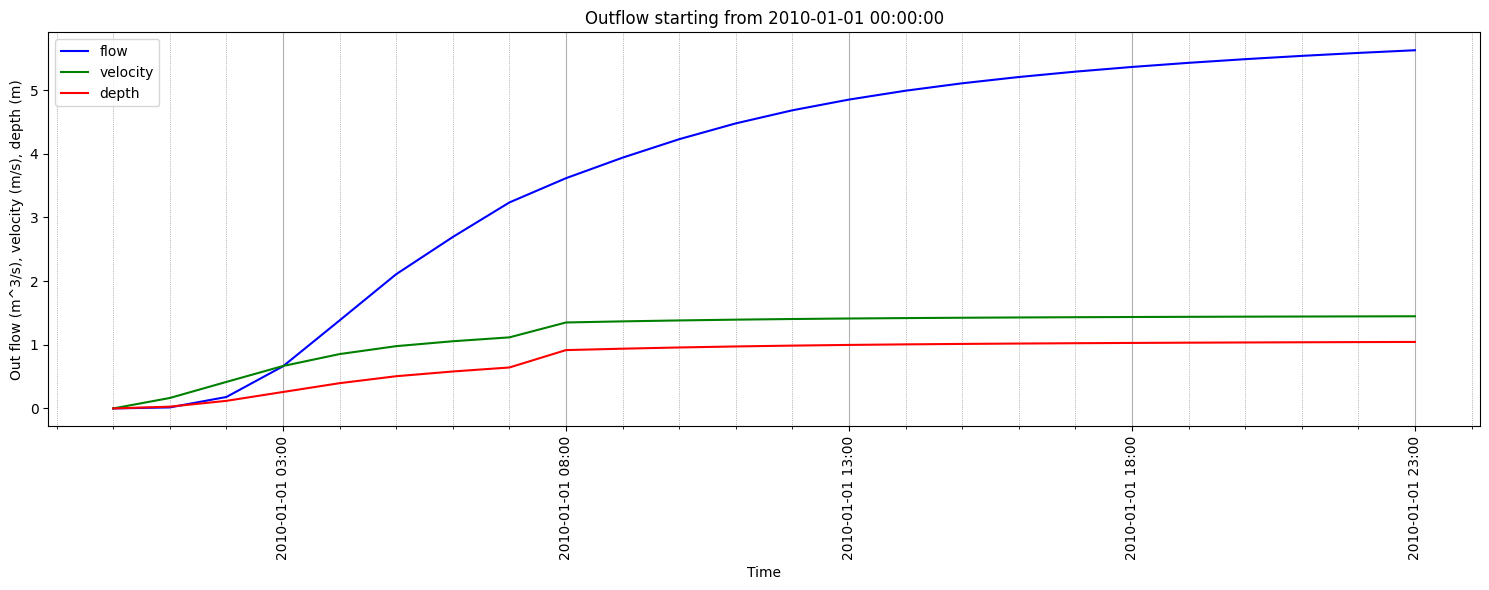

In [59]:
plt.figure(figsize=(15, 6))
plt.plot(catchment_data.index, catchment_data['flow'], label='flow', color='blue', linestyle='-')
plt.plot(catchment_data.index, catchment_data['velocity'], label='velocity', color='green', linestyle='-')
plt.plot(catchment_data.index, catchment_data['depth'], label='depth', color='red', linestyle='-')

first_date = catchment_data.index[0]

plt.xlabel('Time')
plt.ylabel('Out flow (m^3/s), velocity (m/s), depth (m)')
plt.title(f'Outflow starting from {first_date}')

# Formatting the date ticks
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=5))  # Tick every 5 hours for readability
plt.gca().xaxis.set_minor_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.grid(axis='x')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

